# Approaching Categorical Prediction via Classification Algorithm with Pycaret

## Install pycaret library

In [ ]:
# pycaret setup
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 95.2 MB/s eta 0:0

## import numpy, pandas and pycaret libraries

In [ ]:
# import packages
import numpy as np
import pandas as pd
import pycaret
import io

## data load

In [ ]:
# data load
data_path_url = "https://docs.google.com/spreadsheets/d/1vXfORlMaEY-gq_Kb2peG6oYkRbWpUVJs/edit?usp=sharing&ouid=111527061809207196930&rtpof=true&sd=true"
data_path_url_for_pandas = data_path_url.replace("/edit?usp=sharing&ouid=111527061809207196930&rtpof=true&sd=true", "/export?format=csv")
df = pd.read_csv(data_path_url_for_pandas)
# display all columns
pd.set_option("display.max_columns", None)

## data - main features

In [ ]:
# display first 5 rows
df.head(5)


,Patient_ID,Hour,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,PaCO2,Calcium,Creatinine,Platelets,BUN,Glucose,Magnesium,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICU_Type,SepsisLabel
0,6286,27,81,97,"37,39","80,67",15,-2,"0,5","7,44",42,NaN,"1,2",117,15,113,"1,8",4,27,"9,4","71,15",1,"-4,34",2,0
1,2457,34,90,100,"36,6",87,20,NaN,NaN,NaN,NaN,"7,035294118","0,4117647059",NaN,"14,23529412","72,41176471","2,1","4,023529412",NaN,NaN,"51,83",0,"-7,37",1,0
2,8715,8,85,99,38,"62,67",25,0,"0,4125","7,4",38,NaN,"1,1",185,11,"110,3333333","2,3","4,35","31,3","16,6","45,91",1,"-2,87",2,0
3,6588,15,73,98,"37,44",89,15,0,"0,5","7,38",45,"8,2","3,3",137,29,160,"2,1","4,3","38,4","11,6","69,68",1,"-12,36",0,0
4,102417,17,98,94,"37,18",86,21,NaN,NaN,NaN,NaN,"8,9","0,645","139,625","12,75","103,2","1,6","4,05","36,075","16,6875",50,0,"-391,98",2,0


In [ ]:
# data features
df.describe(include = 'all')

,Patient_ID,Hour,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,PaCO2,Calcium,Creatinine,Platelets,BUN,Glucose,Magnesium,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICU_Type,SepsisLabel
count,38550.000000,38550.000000,38550,38543,38256,38550,38500,16446,22906,23195,22593,32020,33506,32987,33866,35572,32283,34919,34202,33257,38550,38550.000000,38550,38550.000000,38550.000000
unique,NaN,NaN,666,271,578,1278,473,1806,1132,2479,3032,5224,5964,7846,4919,6198,2563,3405,7149,6881,4500,NaN,6744,NaN,NaN
top,NaN,NaN,80,100,37,74,18,0,"0,4","7,4",38,"8,6","0,7",187,14,106,2,"3,8",29,"7,2",71,NaN,"-0,02",NaN,NaN
freq,NaN,NaN,1041,9050,1068,905,3512,2409,5850,1079,854,1341,1786,151,1163,350,3219,1965,290,269,490,NaN,4806,NaN,NaN
mean,53904.987782,39.971958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573022,NaN,0.949183,0.500000
std,49911.286156,48.853733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494645,NaN,0.758352,0.500006
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,9129.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
50%,18185.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.500000
75%,108661.500000,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000


In [ ]:
# number of unique values
df.nunique()

Patient_ID     16555
Hour             336
HR               666
O2Sat            271
Temp             578
MAP             1278
Resp             473
BaseExcess      1806
FiO2            1132
pH              2479
PaCO2           3032
Calcium         5224
Creatinine      5964
Platelets       7846
BUN             4919
Glucose         6198
Magnesium       2563
Potassium       3405
Hct             7149
WBC             6881
Age             4500
Gender             2
HospAdmTime     6744
ICU_Type           3
SepsisLabel        2
dtype: int64

In [ ]:
# types of variables
df.dtypes

Patient_ID      int64
Hour            int64
HR             object
O2Sat          object
Temp           object
MAP            object
Resp           object
BaseExcess     object
FiO2           object
pH             object
PaCO2          object
Calcium        object
Creatinine     object
Platelets      object
BUN            object
Glucose        object
Magnesium      object
Potassium      object
Hct            object
WBC            object
Age            object
Gender          int64
HospAdmTime    object
ICU_Type        int64
SepsisLabel     int64
dtype: object

In [ ]:
# number of missing values in columns
df.isnull().sum()

Patient_ID         0
Hour               0
HR                 0
O2Sat              7
Temp             294
MAP                0
Resp              50
BaseExcess     22104
FiO2           15644
pH             15355
PaCO2          15957
Calcium         6530
Creatinine      5044
Platelets       5563
BUN             4684
Glucose         2978
Magnesium       6267
Potassium       3631
Hct             4348
WBC             5293
Age                0
Gender             0
HospAdmTime        0
ICU_Type           0
SepsisLabel        0
dtype: int64

In [ ]:
# percentage of missing values
df.isnull().sum()*100/len(df)

Patient_ID      0.000000
Hour            0.000000
HR              0.000000
O2Sat           0.018158
Temp            0.762646
MAP             0.000000
Resp            0.129702
BaseExcess     57.338521
FiO2           40.581064
pH             39.831388
PaCO2          41.392996
Calcium        16.939040
Creatinine     13.084306
Platelets      14.430610
BUN            12.150454
Glucose         7.725032
Magnesium      16.256809
Potassium       9.418936
Hct            11.278859
WBC            13.730220
Age             0.000000
Gender          0.000000
HospAdmTime     0.000000
ICU_Type        0.000000
SepsisLabel     0.000000
dtype: float64

## high number of missing values in a large data set

In [ ]:
# drop var == nan
missing_value_drop_var = ['BaseExcess'] # assigning BaseExcess var
df_sepsis = df.dropna(subset=missing_value_drop_var) # drop nan of dependent var with corresponding columns
# percentage of missing values of df_sepsis
df_sepsis.isnull().sum()*100/len(df)

Patient_ID     0.000000
Hour           0.000000
HR             0.000000
O2Sat          0.000000
Temp           0.116732
MAP            0.000000
Resp           0.000000
BaseExcess     0.000000
FiO2           4.243839
pH             0.000000
PaCO2          0.645914
Calcium        7.533074
Creatinine     3.595331
Platelets      4.051881
BUN            2.928664
Glucose        2.023346
Magnesium      3.644617
Potassium      1.891051
Hct            1.862516
WBC            3.468223
Age            0.000000
Gender         0.000000
HospAdmTime    0.000000
ICU_Type       0.000000
SepsisLabel    0.000000
dtype: float64

In [ ]:
# display column (variable) names
df.columns

Index(['Patient_ID', 'Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp',
       'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Calcium', 'Creatinine',
       'Platelets', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'WBC',
       'Age', 'Gender', 'HospAdmTime', 'ICU_Type', 'SepsisLabel'],
      dtype='object')

In [ ]:
# all variables are selected as a list

selected_variables = ['Patient_ID', 'Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp',
       'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Calcium', 'Creatinine',
       'Platelets', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'WBC',
       'Age', 'Gender', 'HospAdmTime', 'ICU_Type', 'SepsisLabel']

In [ ]:
# display data with selected variables
df_sepsis = df_sepsis[selected_variables]
df_sepsis

,Patient_ID,Hour,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,PaCO2,Calcium,Creatinine,Platelets,BUN,Glucose,Magnesium,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICU_Type,SepsisLabel
0,6286,27,81,97,"37,39","80,67",15,-2,"0,5","7,44",42,NaN,"1,2",117,15,113,"1,8",4,27,"9,4","71,15",1,"-4,34",2,0
2,8715,8,85,99,38,"62,67",25,0,"0,4125","7,4",38,NaN,"1,1",185,11,"110,3333333","2,3","4,35","31,3","16,6","45,91",1,"-2,87",2,0
3,6588,15,73,98,"37,44",89,15,0,"0,5","7,38",45,"8,2","3,3",137,29,160,"2,1","4,3","38,4","11,6","69,68",1,"-12,36",0,0
5,17135,26,85,100,"37,5",84,"11,5","2,153846154","0,5","7,421538462","41,23076923","8,3","1,3",221,16,90,2,"3,32","34,1","12,5","66,65",1,"-40,05",1,0
8,19072,5,135,94,"35,92",95,10,-4,"0,6142857143","7,36",36,"8,393548387","0,2",249,"3,451612903","108,6","1,890322581","4,175",30,"13,1","48,28",0,"-8,43",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38541,6308,184,77,100,37,64,25,8,"0,4","7,47",45,"7,9","0,6",117,11,84,2,"3,4","36,9","9,2","71,57",1,"-0,02",1,1
38543,11385,29,93,97,"36,94",63,21,0,"0,6","7,4",38,"8,6","0,7",224,35,106,"1,9","3,8","30,5","7,8","86,73",0,"-2,85",0,1
38546,468,88,70,100,"37,94",117,"24,5",2,"0,3","7,48",33,"8,7","0,5",304,20,122,"2,1","3,3","33,6","15,5","71,13",0,"-0,03",0,1
38548,13612,13,68,98,"37,44","77,5",16,4,"0,4","7,46",40,"8,1","0,8",NaN,20,109,"1,9","3,5","29,9","9,2","62,13",1,"-0,02",0,1


# Exploratory analysis with Autoviz

In [ ]:
# install autoviz

!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
target_variable = 'SepsisLabel'
dft = AV.AutoViz(filename='',dfte=df_sepsis, depVar=target_variable)

Output hidden; open in https://colab.research.google.com to view.

# Data preprocessign with pycaret

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
data = df_sepsis
s = setup(data, target = 'SepsisLabel', session_id = 123,numeric_imputation = "knn",
          remove_multicollinearity = True, normalize = True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,SepsisLabel
2,Target type,Binary
3,Original data shape,"(16446, 25)"
4,Transformed data shape,"(16446, 25)"
5,Transformed train set shape,"(13156, 25)"
6,Transformed test set shape,"(3290, 25)"
7,Numeric features,4
8,Categorical features,20
9,Rows with missing values,28.7%


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8442,0.9089,0.9613,0.8106,0.8795,0.6634,0.6831,3.1500
qda,Quadratic Discriminant Analysis,0.8396,0.8891,0.9061,0.8366,0.8699,0.6617,0.6655,1.5330
xgboost,Extreme Gradient Boosting,0.8386,0.8955,0.9430,0.8139,0.8737,0.6537,0.6675,3.6350
gbc,Gradient Boosting Classifier,0.8352,0.8917,0.9507,0.8058,0.8722,0.6446,0.6623,5.3460
lightgbm,Light Gradient Boosting Machine,0.8325,0.8911,0.9436,0.8064,0.8696,0.6396,0.6552,3.4260
rf,Random Forest Classifier,0.8304,0.8930,0.9630,0.7942,0.8705,0.6314,0.6565,3.8250
lr,Logistic Regression,0.8212,0.8766,0.8957,0.8192,0.8557,0.6220,0.6266,3.8070
nb,Naive Bayes,0.8200,0.8770,0.8853,0.8238,0.8534,0.6211,0.6240,1.4410
lda,Linear Discriminant Analysis,0.8172,0.8745,0.9301,0.7956,0.8576,0.6067,0.6214,1.3850
ridge,Ridge Classifier,0.8167,0.0000,0.9304,0.7949,0.8573,0.6056,0.6205,1.3880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# create individually 2 best models
et = create_model('et')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8457,0.9068,0.9589,0.8135,0.8802,0.6676,0.6856
1,0.8313,0.9039,0.9499,0.8017,0.8696,0.6356,0.6542
2,0.8511,0.9059,0.9628,0.8179,0.8844,0.6789,0.6969
3,0.8465,0.8990,0.9666,0.8105,0.8817,0.6679,0.6891
4,0.8465,0.9184,0.9615,0.8132,0.8812,0.6687,0.6876
5,0.8442,0.9055,0.9653,0.8086,0.8800,0.6628,0.6843
6,0.8502,0.9143,0.9692,0.8134,0.8845,0.6760,0.6973
7,0.8433,0.9146,0.9614,0.8095,0.8790,0.6616,0.6814
8,0.8510,0.9127,0.9717,0.8129,0.8852,0.6774,0.6996


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

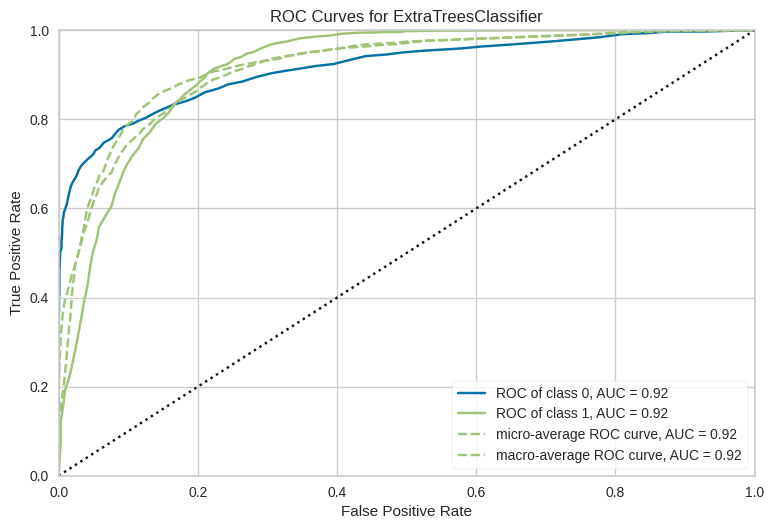

In [ ]:
# ROC curve and auc value
plot_model(et, plot= 'auc')


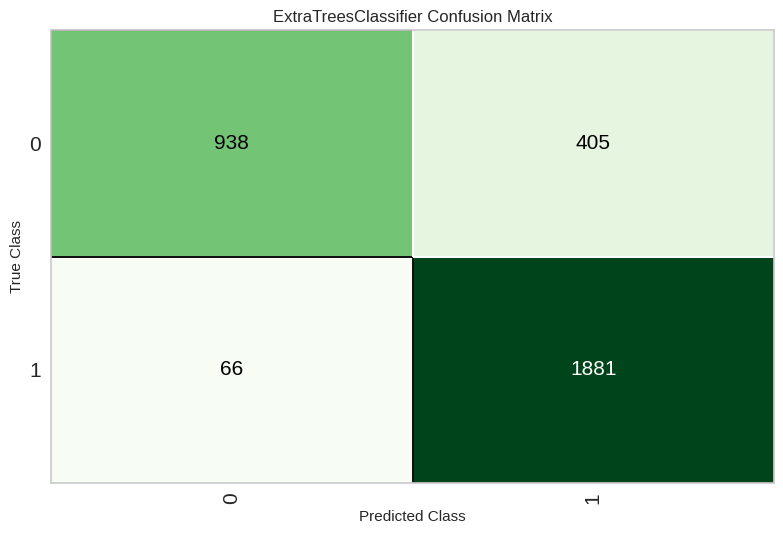

In [ ]:
# confusion matrix
plot_model(et, plot= 'confusion_matrix')

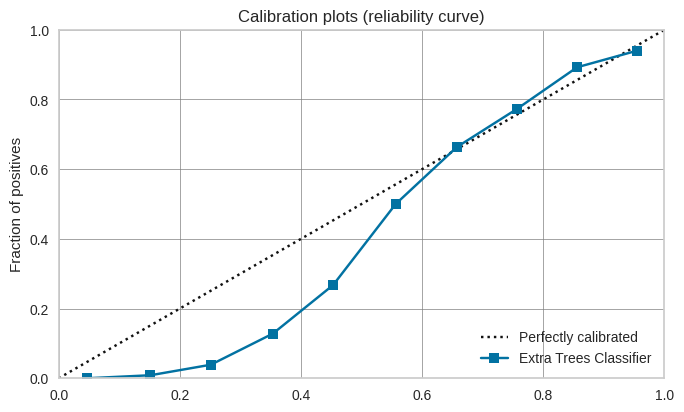

In [ ]:
# calibration plot
plot_model(et, plot= 'calibration')

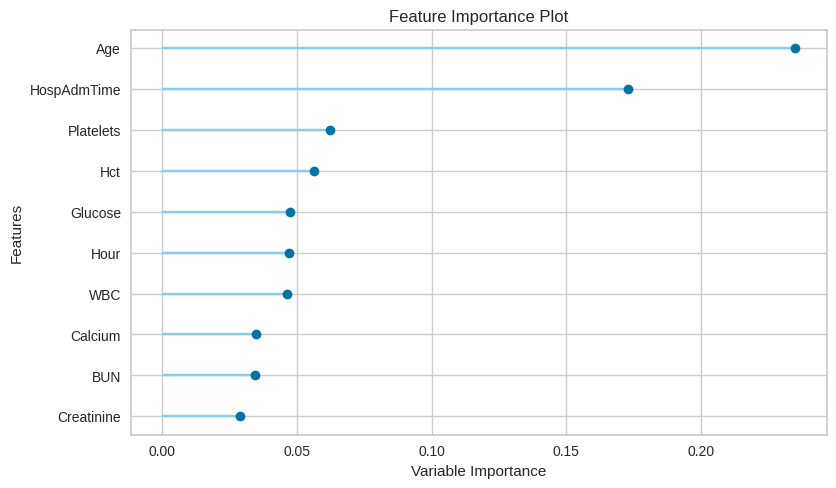

In [ ]:
# Feature Importance (Top 10)
plot_model(et, plot= 'feature')

In [ ]:
# parameters
plot_model(et, plot= 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


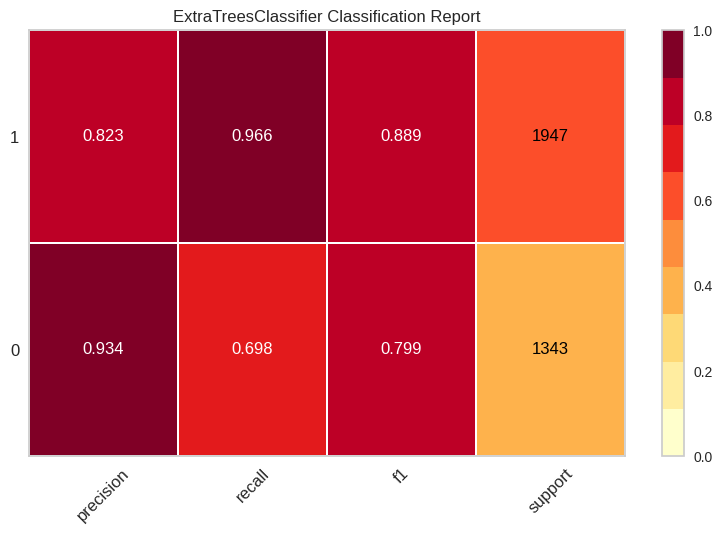

In [ ]:
# Classification Report
plot_model(et, plot= 'class_report')

In [ ]:
# performance on test data set
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8568,0.9157,0.9661,0.8228,0.8887,0.6916,0.7093


,Patient_ID,Hour,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,...,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICU_Type,SepsisLabel,prediction_label,prediction_score
7804,4449,10,82,100,37,61,15,"-0,6666666667","0,4","7,329166667",...,"4,433333333","36,08333333","15,73333333","18,54",1,"-0,02",1,0,0,0.87
12808,10001,21,94,93,"36,43",94,25,0,"0,4666666667","7,466666667",...,"3,6","26,5","6,3","87,2",1,"-102,37",1,0,0,0.68
17717,15722,13,84,97,37,75,19,"-1,25","0,4","7,41",...,"4,3","29,3","8,8","77,67",1,"-0,04",2,0,1,0.51
36120,5037,72,60,93,"37,5",91,19,"0,4285714286","0,76","7,498571429",...,"4,4",28,"12,1","68,79",1,"-0,02",0,1,1,0.86
3876,2355,6,87,100,"37,17",69,17,-5,"0,6","7,26",...,"4,4","17,7",6,"61,55",0,"-356,69",1,0,1,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,17776,26,68,95,"36,81","112,5",22,-3,"0,5","7,405",...,4,"35,5","14,9","26,13",1,"-0,03",1,1,1,0.83
28973,8316,9,85,97,"36,61",87,18,-1,NaN,"7,37",...,"6,7",32,"8,1","53,68",1,"-0,03",1,1,1,0.82
11072,15549,24,89,96,"38,1",72,26,-2,"0,5","7,44",...,4,31,"10,4","61,84",1,"-84,38",2,0,1,0.60
22817,3959,23,117,95,"35,56","80,33",29,-13,1,"7,15",...,"5,3","43,4","12,6","71,03",0,"-0,03",0,1,1,0.99


# END